<a href="https://colab.research.google.com/github/Zoya-Haris/Machine-Learning/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [ ]:
df = pd.read_excel('/content/Folds5x2_pp.xlsx')

In [ ]:
df.head()


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
x = df.drop(['PE'],axis = 1).values
y = df['PE'].values

In [ ]:
print(x)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [ ]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.3,random_state=0)


In [ ]:
x_train.shape,y_train.shape

((6697, 4), (6697,))

In [ ]:
x_test.shape,y_test.shape

((2871, 4), (2871,))

In [ ]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = ml.predict(x_test)
y_pred

array([431.40245096, 458.61474119, 462.81967423, ..., 432.47380825,
       436.16417243, 439.00714594])

In [ ]:
ml.predict([[14.96,	41.76,	1024.07,	73.17	]])

array([467.34820092])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9304112159477683

In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

4.513134498647909

In [ ]:
MSE =  metrics.mean_squared_error(y_test, y_pred)
MSE

20.36838300288591

Text(0.5, 1.0, 'ACTUAL VS PREDICTED')

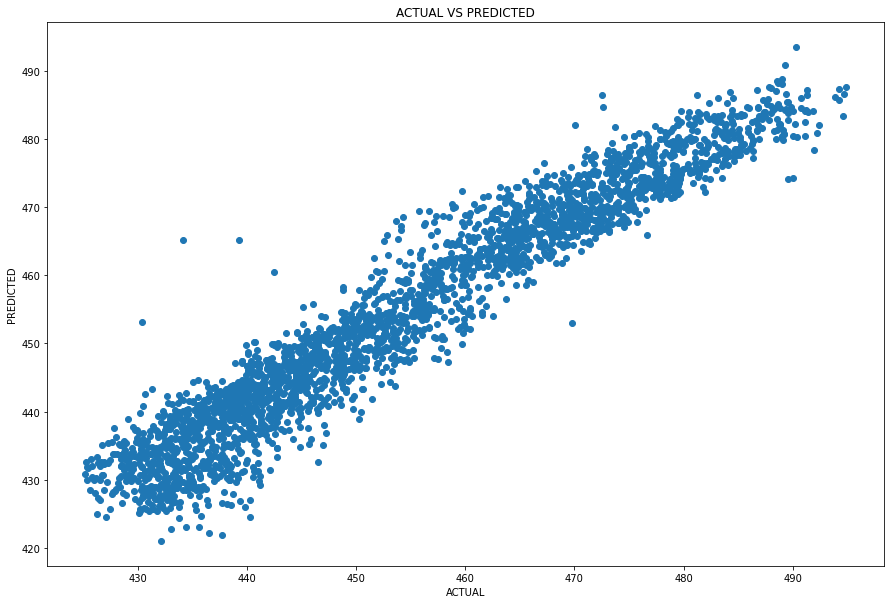

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('ACTUAL')
plt.ylabel('PREDICTED')
plt.title('ACTUAL VS PREDICTED')


In [ ]:
y_test,y_pred

(array([431.23, 460.01, 461.14, ..., 426.86, 433.4 , 441.94]),
 array([431.40245096, 458.61474119, 462.81967423, ..., 432.47380825,
        436.16417243, 439.00714594]))

In [ ]:
pred_y_df = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred, 'Error':y_test-y_pred})
pred_y_df

,Actual value,Predicted value,Error
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
...,...,...,...
2866,475.86,472.027234,3.832766
2867,477.94,474.005522,3.934478
2868,426.86,432.473808,-5.613808
2869,433.40,436.164172,-2.764172
